In [566]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#warnings.filterwarnings('ignore') # Ignore warning messages

In [567]:
df = pd.read_csv(r'C:\Users\Omar Ayman\Downloads\netflix notebook\netflix_titles.csv', index_col='show_id')

In [568]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


In [569]:
pd.set_option('display.max_rows', 8807)
pd.set_option('display.max_columns', 12)

In [570]:
df.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [571]:
df[['director', 'cast', 'country']] = df[['director', 'cast', 'country']].fillna('anonymous')
df['duration'] = df['duration'].fillna('')
df['rating'] = df['rating'].fillna('not rated')

In [572]:
df['date_added'].head()

show_id
s1    September 25, 2021
s2    September 24, 2021
s3    September 24, 2021
s4    September 24, 2021
s5    September 24, 2021
Name: date_added, dtype: object

In [573]:
from datetime import datetime
def sol(date):
    if(type(date)==str):
        date = date.strip()
        date = datetime.strptime(date, '%B %d, %Y')
        date = date.strftime('%m-%d-%Y')
    else:
        date=''
    return date

In [574]:
df['date_added'] = df['date_added'].apply(sol)

In [575]:
df[['month added', 'day added','year added']] = df['date_added'].str.split('-', expand=True)

df[df['date_added']=='']['year added']

show_id
s6067    None
s6175    None
s6796    None
s6807    None
s6902    None
s7197    None
s7255    None
s7407    None
s7848    None
s8183    None
Name: year added, dtype: object

In [576]:
import re
def sol(x):
    if(x.__contains__('min')):
        return int(re.search(r'\d+', x).group())
    else:
        return ''
    
def sol2(x):
    if(x.__contains__('Season')):
        return int(re.search(r'\d+', x).group())
    else:
        return ''
    
df['duration (in min)'] = df['duration'].apply(sol)
df['duration (in season)'] = df['duration'].apply(sol2)
df.drop(columns=['duration'], inplace=True)

In [577]:
import re

def extract_number(s):
    return int(re.search(r'\d+', s).group())

s = '23 min'
number = extract_number(s)
print(number)

23


In [578]:
df.head()

,type,title,director,cast,country,date_added,...,description,month added,day added,year added,duration (in min),duration (in season)
show_id,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,anonymous,United States,09-25-2021,...,"As her father nears the end of his life, filmm...",09,25,2021,90,
s2,TV Show,Blood & Water,anonymous,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,09-24-2021,...,"After crossing paths at a party, a Cape Town t...",09,24,2021,,2
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",anonymous,09-24-2021,...,To protect his family from a powerful drug lor...,09,24,2021,,1
s4,TV Show,Jailbirds New Orleans,anonymous,anonymous,anonymous,09-24-2021,...,"Feuds, flirtations and toilet talk go down amo...",09,24,2021,,1
s5,TV Show,Kota Factory,anonymous,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,09-24-2021,...,In a city of coaching centers known to train I...,09,24,2021,,2


In [579]:
# Histogram , Bar plot, Pie chart, Line plot, Scatter plot, Heat map, Box plot, Pair plot, pie chart

C:\Users\Omar Ayman\AppData\Local\Temp\ipykernel_11188\3008608766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['year added'] = plot_df['year added'].apply(lambda x: int(x))


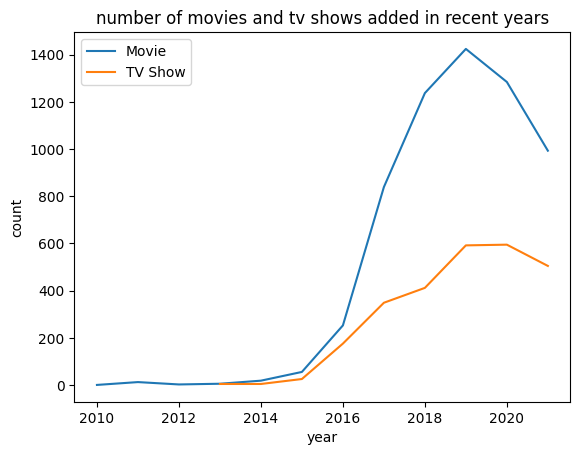

In [580]:
plot_df = df[~(df['date_added']=='')]
plot_df['year added'] = plot_df['year added'].apply(lambda x: int(x))
plot_df = plot_df[plot_df['year added']>=2010].groupby(['year added', 'type']).size().reset_index(name='count')
sns.lineplot(data=plot_df, x='year added', y='count', hue='type')
plt.title('number of movies and tv shows added in recent years')
plt.xlabel('year')
plt.legend()
plt.show()

In [581]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'listed_in', 'description', 'month added',
       'day added', 'year added', 'duration (in min)', 'duration (in season)'],
      dtype='object')

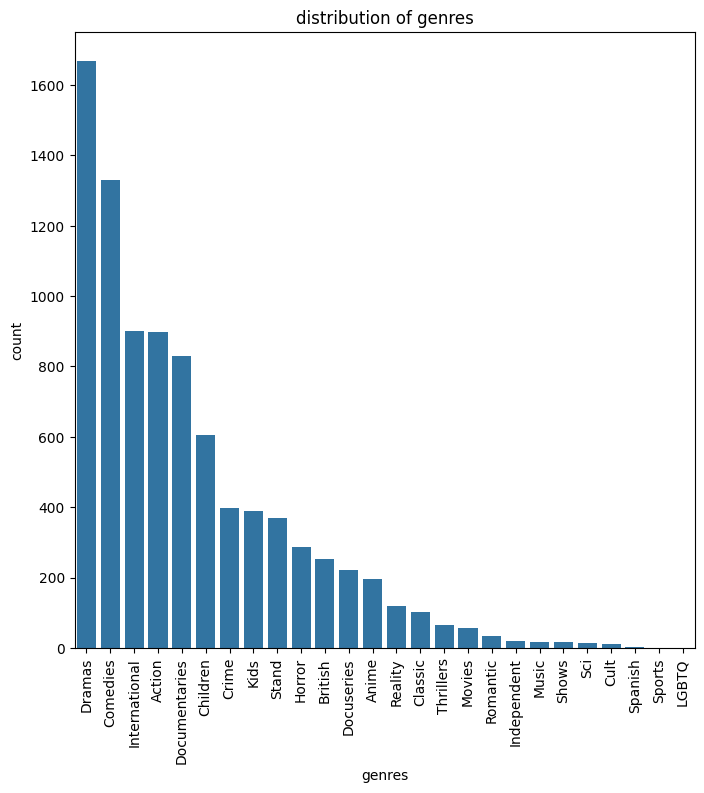

In [582]:
df['genres'] = df['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)
genre_counts = df.groupby('genres').size().reset_index(name='count').sort_values(by='count', ascending=False)
plt.figure(figsize=(8, 8))
sns.barplot(data=genre_counts, y='count', x='genres')
plt.title('distribution of genres')
plt.xticks(rotation=90)
plt.show()

In [583]:
df[(df['country']=='Egypt') & (df['director']!='anonymous')].groupby('director')['title'].apply(list)

director
Ahmad El-Badri                           [My Sleeping Lover, Omar & Salma 2, The Player]
Ahmad Samir Farag                                                         [Love Station]
Ahmed Al-Badry                                                               [Game Over]
Ahmed El Gendy                                             [Monopoly (The Bank Of Luck)]
Ahmed Medhat                                                  [The International Player]
Ahmed Nader Galal                      [Son Of Adam, Can’t Complain, We'll Be Right B...
Ahmed Saleh                                                                 [The Dealer]
Ahmed Yousry, Hazem Fouda                                                    [Boushkash]
Akram Farouk                                                          [Hamza's Suitcase]
Ali Ragab                                                     [Karkar, The Beach Loafer]
Amr Arafa                              [She Made Me a Criminal, Sameer Abu Alneel, Th...
Amr Salama  

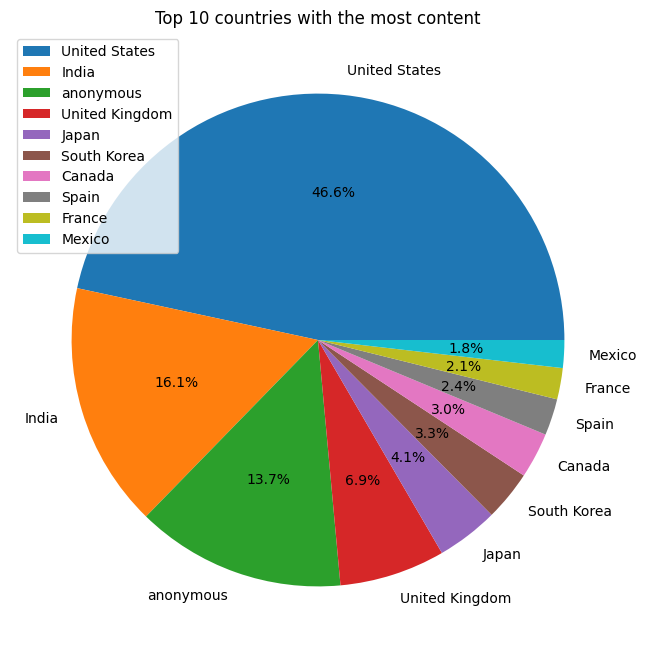

In [584]:
plt.figure(figsize=(8, 8))
plt.pie(df['country'].value_counts().head(10), labels=df['country'].value_counts().head(10).index, autopct='%1.1f%%')
plt.title('Top 10 countries with the most content')
plt.legend(loc='upper left')
plt.show()

In [590]:
tmp = df[(df['type']=='TV Show') & (df['country']=='United States') & (df['duration (in season)']!='')]
tmp['duration (in season)'] = tmp['duration (in season)'].astype(int)
tmp[tmp['duration (in season)']<=2][['title', 'duration (in season)']].sort_values(by='duration (in season)', ascending=False).head()

C:\Users\Omar Ayman\AppData\Local\Temp\ipykernel_11188\265539768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['duration (in season)'] = tmp['duration (in season)'].astype(int)


,title,duration (in season)
show_id,,
s1544,Black Ink Crew New York,2
s3147,Scooby-Doo!: Mystery Incorporated,2
s1616,Ink Master,2
s6869,Goldie & Bear,2
s3184,The Last O.G.,2
